# (FordGoBike Dataset )
## by (Sultan Alrajhi)

## Investigation Overview

> in this investigation, I wanted to look into the behaviors of the relationship between customers and subscribers.

## Dataset Overview

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('fordgobike.csv')

## Customers vs Subscribers usage

> Subscribers have higher tendency to use the service than customers. As shown they make 78.7% of the users because its an effecient way to ride to work. I guess also it is cheaper for subscribers to ride.

In [3]:
customer = df.query('user_type == "Customer"')['bike_id'].count()
subscriber = df.query('user_type == "Subscriber"')['bike_id'].count()
customer_prop = customer / df['bike_id'].count()
subscriber_prop = subscriber / df['bike_id'].count()

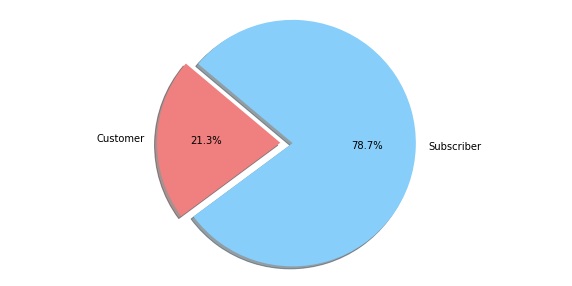

In [4]:
plt.figure(figsize = [10, 5])

labels = ['Customer', 'Subscriber']
sizes = [customer, subscriber]
colors = ['lightcoral', 'lightskyblue']
explode = (0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors = colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

## which user type has a longer duration in the weekdays?

> I'm interrested to find which user type has longer duration in the weekdays  because it would be obvious that customers has higher duration during weekends.
I found this visualization suprising to me! clearly customers have much higher duration than subscribers all days.

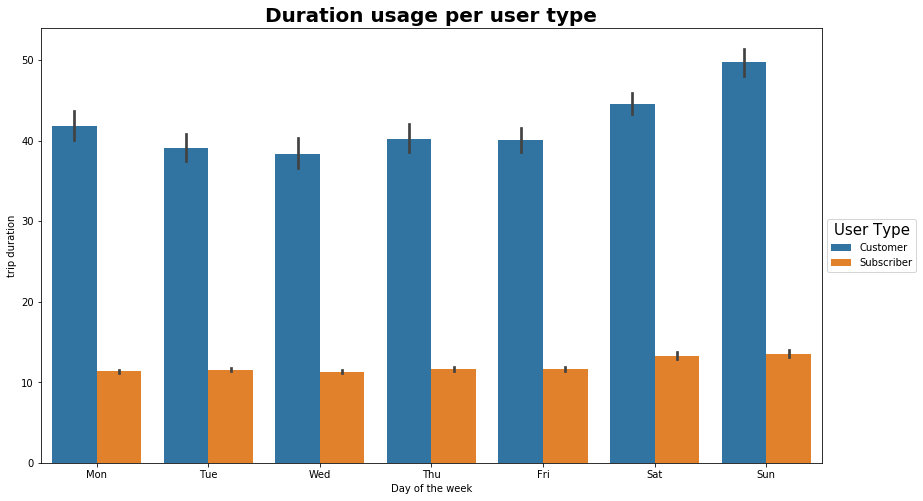

In [5]:
weekday =  ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.figure(figsize=[14 , 8])
sb.barplot(data=df , x = 'start_day' , y = 'duration_min' , hue = 'user_type', order=weekday);
plt.xlabel('Day of the week')
plt.ylabel('trip duration')
plt.legend(loc ='center left' , bbox_to_anchor=(1,0.5) , title='User Type' , title_fontsize = 15);
plt.title('Duration usage per user type' , fontsize = 20 , fontweight = 'semibold');

## The hourly usage during weekdays for customers and subscribers


> Subscribers usage on monday to friday from 8-17 which suggests that they are going to work. Customers ride in the weekends from 10-16 which suggest that they are visitors

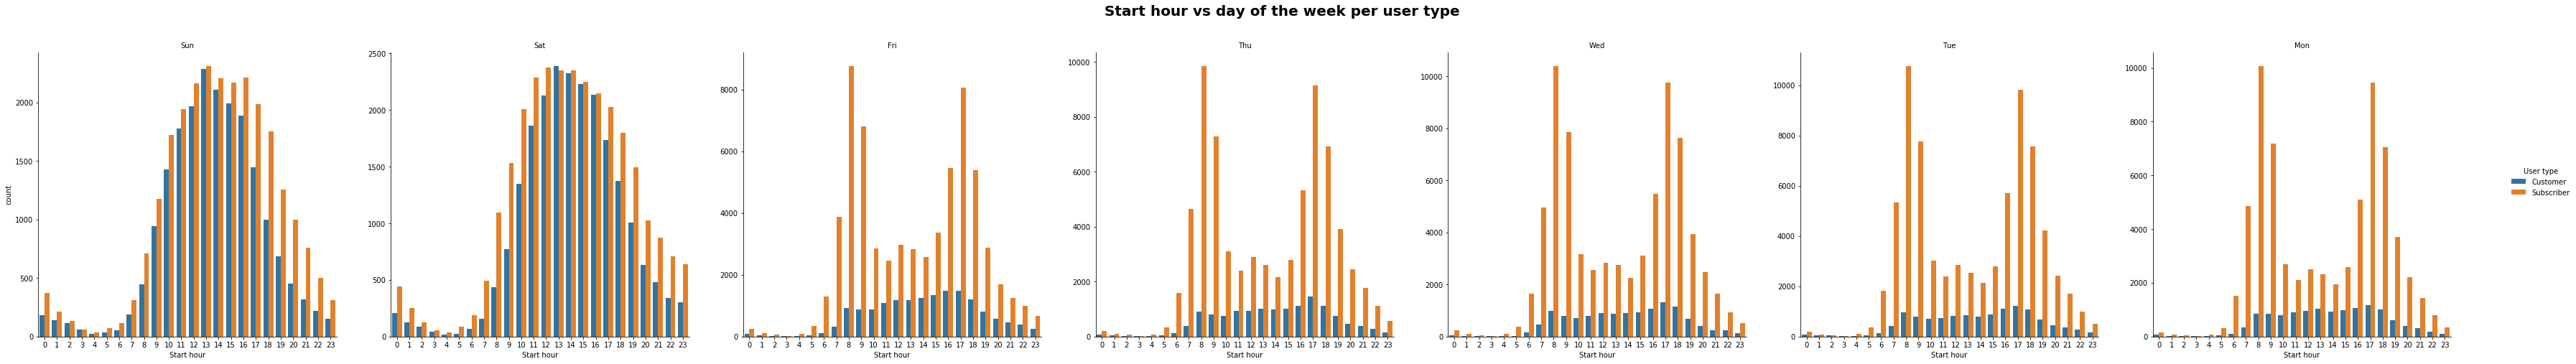

In [6]:
p = sb.catplot(data = df, x = 'start_hour', col = 'start_day', hue = "user_type",height=3, aspect=1.5 ,kind = 'count', sharey = False)
p.fig.set_size_inches(50,8)
p.set_axis_labels("Start hour")
p._legend.set_title('User type')
p.set_titles("{col_name}")
plt.suptitle("Start hour vs day of the week per user type", y=1, fontsize=20,fontweight='bold')
plt.show()

In [7]:
!jupyter nbconvert slide_deck.ipynb --to slides --post serve --template output_toggle.tpl

[NbConvertApp] Converting notebook slide_deck.ipynb to slides
[NbConvertApp] Writing 388701 bytes to slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/slide_deck.slides.html
Use Control-C to stop this server
^C

Interrupted
